In [2]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [3]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(5)

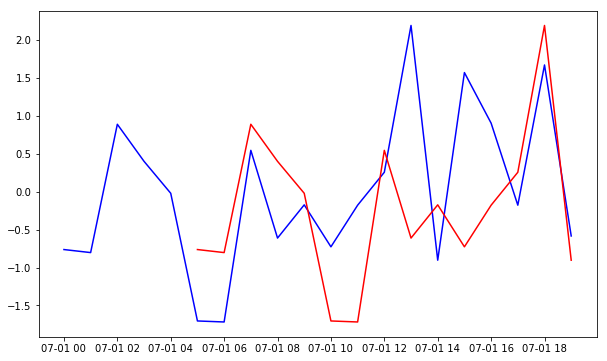

In [4]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the future' instead of into the past?

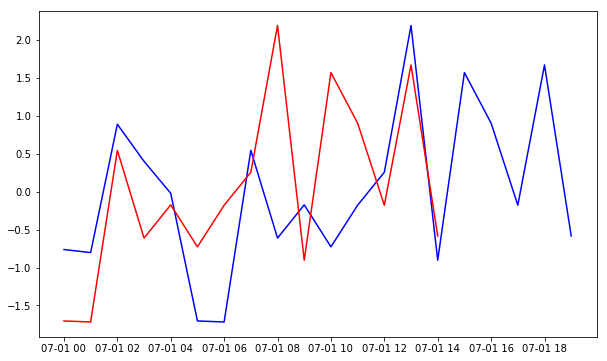

In [5]:
# %load snippets/shift_future.py
ts_lagged = ts.shift(-5)
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

# Window functions give you moving aggregate measures of a time series

In [6]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()


In [23]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

In [24]:
df.head()

,A,B,C
2016-05-01,-0.759541,0.392070,0.489365
2016-05-02,0.260687,-0.143550,2.991985
2016-05-03,-0.292185,-0.601011,-1.036268
2016-05-04,0.004878,-1.277206,0.819621
2016-05-05,0.833843,1.549237,-0.038193


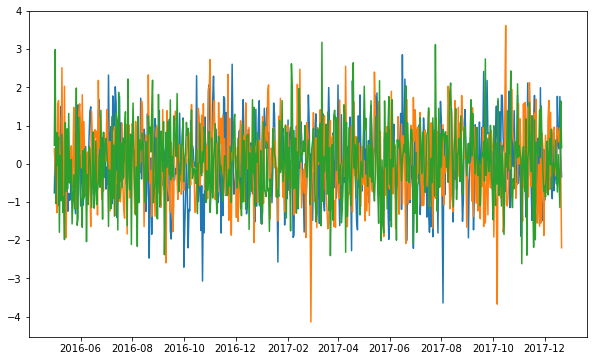

In [25]:
plt.plot(df)

In [26]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

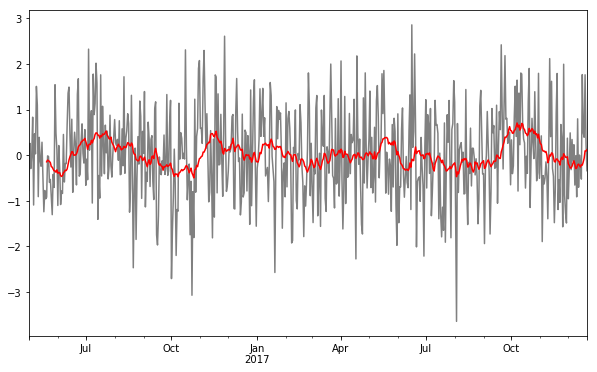

In [27]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

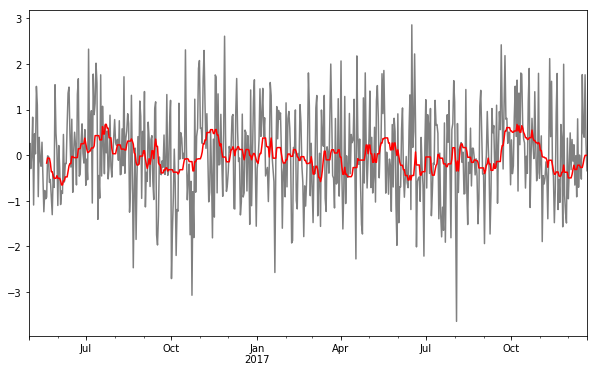

In [28]:
df['A'].plot(color = 'gray')
r.median()['A'].plot(color = 'red')

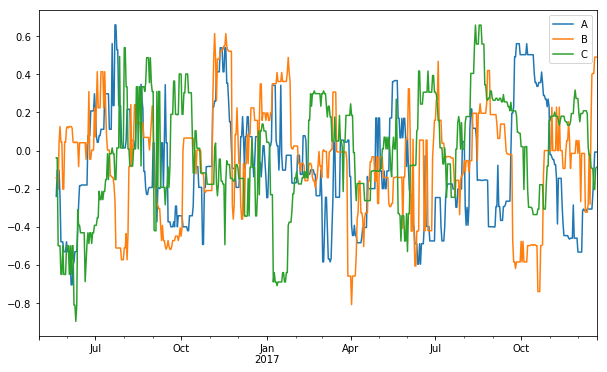

In [29]:
r.quantile(0.5).plot()
plt.show()

### What about a custom function?

In [21]:
# %load snippets/custom_rolling.py
df.rolling(window=10, center=False).apply(lambda x: x[1]/x[2])[1:10]

,A,B,C
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,0.272653,-8.091007,0.324028


### What if I want to generate a rolling window function of monthly data from daily data?

In [30]:
# %load snippets/resample_rolling.py
df.resample('M').rolling(window=10, center=False).apply(lambda x: x[1]/x[2])[1:10]

/Users/TarjaniAgrawal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


,A,B,C
2016-06-30,NaN,NaN,NaN
2016-07-31,NaN,NaN,NaN
2016-08-31,NaN,NaN,NaN
2016-09-30,NaN,NaN,NaN
2016-10-31,NaN,NaN,NaN
2016-11-30,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN
2017-01-31,NaN,NaN,NaN
2017-02-28,0.322827,-2.165145,-32.69183


## Expanding windows

In [31]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,-0.249427,0.124260,1.740675
2016-05-03,-0.263680,-0.117497,0.815028
2016-05-04,-0.196540,-0.407424,0.816176
2016-05-05,0.009536,-0.016092,0.645302


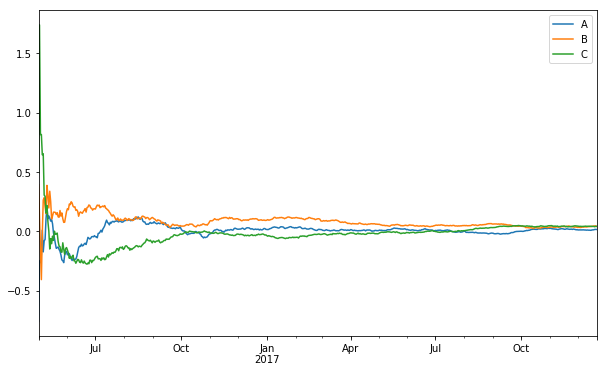

In [32]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

Adding more data and when you already have a old data. 


(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

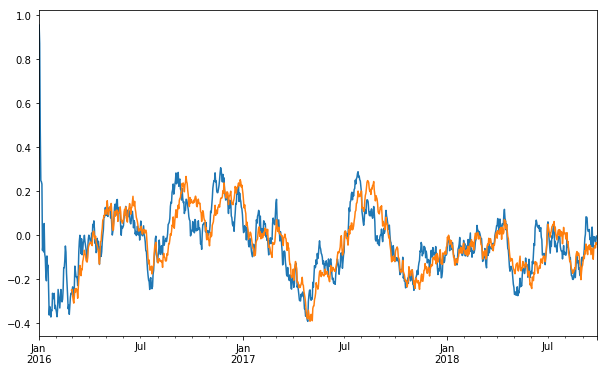

In [34]:
# %load snippets/window_funcs_try.py
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', periods = 1000, freq = 'D'))
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts.rolling(window = 60).mean().plot()


In [37]:
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])[20:30]

,A,B,C
2016-05-21,-0.013992,0.125982,0.060078
2016-05-22,-0.028023,0.125982,-0.038193
2016-05-23,-0.028023,0.125982,-0.038193
2016-05-24,-0.103194,0.153634,-0.283043
2016-05-25,-0.240739,0.125982,-0.500090
2016-05-26,-0.240739,0.125982,-0.500090
2016-05-27,-0.419112,0.044577,-0.309973
2016-05-28,-0.479491,0.044577,-0.500090
2016-05-29,-0.479491,0.118253,-0.500090
2016-05-30,-0.479491,0.118253,-0.500090


In [38]:
r = df.rolling(window = 20)
r.agg(['sum', 'count']).head()

A         B         C      
           sum count sum count sum count
2016-05-01 NaN   1.0 NaN   1.0 NaN   1.0
2016-05-02 NaN   2.0 NaN   2.0 NaN   2.0
2016-05-03 NaN   3.0 NaN   3.0 NaN   3.0
2016-05-04 NaN   4.0 NaN   4.0 NaN   4.0
2016-05-05 NaN   5.0 NaN   5.0 NaN   5.0